In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def kelly_coin_tossing(n_tosses, p, f, capital=1, set_seed = True, seed_id = 192):
    """
        Betting strategy based on the Kelly criterion in a coin flipping game. This is the ideal
        setting to reveal the advantage of the Kelly strategy over a strategy which maximizes the 
        expectation.
        Parameters
        ----------
        n_tosses: number of times to play the coin tossing game.
        p: probability of the coin toss being heads (this is the outcome we are betting on).
        f: fraction of capital remianing to bet. If None, fraction is calculated using the
           Kelly criterion.
        capital: starting capital
        set_seed: use a seed for the random process, default=True.as_integer_ratio
        seed_id: seed id.
        Returns the capital history.
    """
    if f == None:
        f = 2 * p - 1
    if set_seed:
        np.random.seed(seed_id)
    capital_log = []
    capital_log.append(capital)
    for n in range(n_tosses):
        toss = np.random.uniform(0, 1)
        if toss < p:
            capital += f * capital
            capital_log.append(capital)
        else:
            capital -= f * capital
            capital_log.append(capital)
    return capital_log

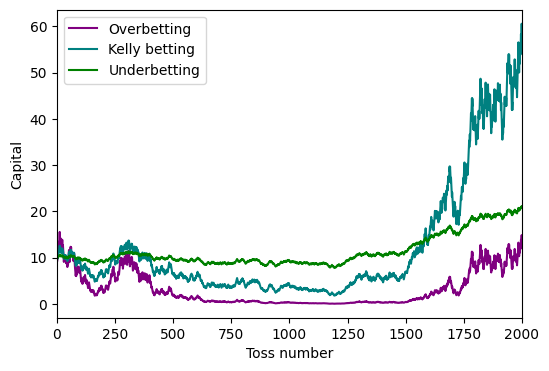

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(range(2001), kelly_coin_tossing(n_tosses=2000, p=0.52, f=0.08, capital=10), color='purple', label='Overbetting')
ax.plot(range(2001), kelly_coin_tossing(n_tosses=2000, p=0.52, f=None, capital=10), color='teal', label='Kelly betting')
ax.plot(range(2001), kelly_coin_tossing(n_tosses=2000, p=0.52, f=0.01, capital=10), color='green', label='Underbetting')
ax.set_xlabel('Toss number')
ax.set_ylabel('Capital')
ax. set_xlim([0, 2000])
ax.legend()

The weak Law of Large Numbers states that the sample mean approaches the population mean in probability, when the sample size goes to infinity. An illustration of this is below. The difference between the sample mean and the population mean, on the other hand, diverges. For this reason, a strategy based on maximizing the expectation (expected winnings) is likely to end up in gamblers ruin.

Text(0, 0.5, '$\\mu_{sample}$ - $\\mu_{pop}$')

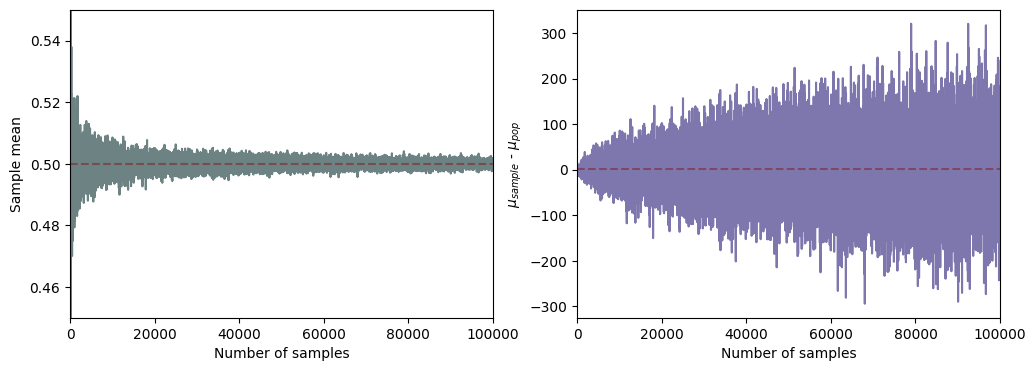

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
means = []
sums = []
for n_samples in range(5, 100000, 5):
    samples = np.random.uniform(0, 1, n_samples)
    mean = samples.mean()
    Sum = samples.sum()
    means.append(mean)
    sums.append(Sum)
    
ax[0].plot(range(5, 100000, 5), means, color='darkslategrey', alpha=0.7)
ax[0].hlines(0.5, 0, 100000, color='maroon', alpha=0.4, linestyles='--', linewidth=1.5) 
ax[0].set_xlabel('Number of samples')
ax[0].set_ylabel('Sample mean')
ax[0].set_xlim([0, 100000])
ax[0].set_ylim([0.45, 0.55])
ax[1].plot(range(5, 100000, 5), np.array(sums) - np.array(range(5, 100000, 5)) * 0.5, color='darkslateblue', alpha=0.7)
ax[1].set_xlim([0, 100000])
ax[1].hlines(0.5, 0, 100000, color='maroon', alpha=0.4, linestyles='--', linewidth=1.5) 
ax[1].set_xlabel('Number of samples')
ax[1].set_ylabel('$\mu_{sample}$ - $\mu_{pop}$')

In [27]:
def fixed_bet_coin_tossing(n_tosses, p, bet, capital=1, set_seed = True, seed_id = 192):
    """
        Fixed size betting.
        Parameters
        ----------
        n_tosses: number of times to play the coin tossing game.
        p: probability of the coin toss being heads (this is the outcome we are betting on).
        bet: bet size
        capital: starting capital
        set_seed: use a seed for the random process, default=True.as_integer_ratio
        seed_id: seed id.
        Returns the capital history.
    """
    if set_seed:
        np.random.seed(seed_id)
    capital_log = []
    capital_log.append(capital)
    for n in range(n_tosses):
        toss = np.random.uniform(0, 1)
        if toss < p:
            capital += bet
            capital_log.append(capital)
        else:
            capital -= bet
            capital_log.append(capital)
    return capital_log

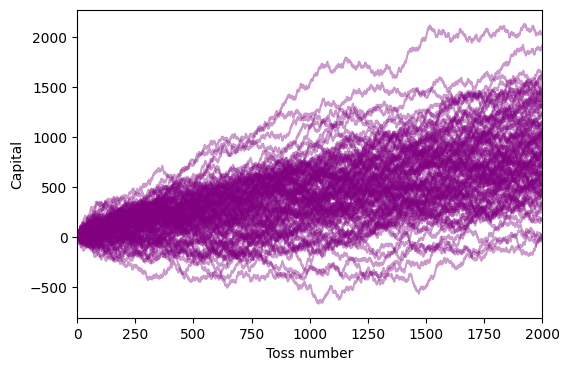

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_xlabel('Toss number')
ax.set_ylabel('Capital')
ax. set_xlim([0, 2000])
for run in range(100):
    c = fixed_bet_coin_tossing(n_tosses=2000, p=0.52, bet=10, capital=10, set_seed = False)
    ax.plot(range(2001), c, color='purple', alpha=0.4)